### Explorative Analyse der Smartmeter Daten

In [5]:
import sys
import os
sys.path.append(os.path.abspath("../src"))

from data_loader import smartmeter_load
import seaborn as sns
import matplotlib as plt
import polars as pl

In [2]:
smart_meter = smartmeter_load(data_path ='../data/raw/households')
smart_meter

timestamp,timestamp_local,date,household_id,group_assignment,affects_timepoint,kwh_received_total,kwh_received_heatpump,kwh_received_other,kwh_returned_total
"datetime[μs, UTC]","datetime[μs, Europe/Zurich]",date,str,str,str,f64,f64,f64,f64
2019-03-02 23:59:59 UTC,2019-03-03 00:59:59 CET,2019-03-03,"""100101""","""control""","""unknown""",18.33,null,null,8.64
2019-03-03 23:59:59 UTC,2019-03-04 00:59:59 CET,2019-03-04,"""100101""","""control""","""unknown""",15.03,null,null,9.04
2019-03-04 23:59:59 UTC,2019-03-05 00:59:59 CET,2019-03-05,"""100101""","""control""","""unknown""",16.69,null,null,4.57
2019-03-05 23:59:59 UTC,2019-03-06 00:59:59 CET,2019-03-06,"""100101""","""control""","""unknown""",29.52,null,null,15.27
2019-03-06 23:59:59 UTC,2019-03-07 00:59:59 CET,2019-03-07,"""100101""","""control""","""unknown""",16.81,null,null,14.43
…,…,…,…,…,…,…,…,…,…
2024-03-16 23:59:59 UTC,2024-03-17 00:59:59 CET,2024-03-17,"""998181""","""control""","""unknown""",10.14,null,null,5.7
2024-03-17 23:59:59 UTC,2024-03-18 00:59:59 CET,2024-03-18,"""998181""","""control""","""unknown""",12.9,null,null,0.65
2024-03-18 23:59:59 UTC,2024-03-19 00:59:59 CET,2024-03-19,"""998181""","""control""","""unknown""",13.83,null,null,0.16


In [4]:
smart_meter.describe()


statistic,timestamp,timestamp_local,date,household_id,group_assignment,affects_timepoint,kwh_received_total,kwh_received_heatpump,kwh_received_other,kwh_returned_total
str,str,str,str,str,str,str,f64,f64,f64,f64
"""count""","""936026""","""936026""","""936026""","""936026""","""936026""","""936026""",916807.0,35694.0,29075.0,230402.0
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""",19219.0,900332.0,906951.0,705624.0
"""mean""","""2022-04-12 11:46:29.668635+00:…","""2022-04-12 13:46:29.668635+02:…","""2022-04-12 11:46:30.668635""",null,null,null,27.785552,21.378717,20.821304,17.992046
"""std""",null,null,null,null,null,null,23.272086,29.524287,20.726929,21.587601
"""min""","""2018-11-02 23:59:59+00:00""","""2018-11-03 00:59:59+01:00""","""2018-11-03""","""100101""","""control""","""after visit""",0.01,0.01,0.3,0.01
"""25%""","""2021-03-17 23:59:59+00:00""","""2021-03-18 00:59:59+01:00""","""2021-03-18""",null,null,null,12.6,5.56,9.3,1.27
"""50%""","""2022-08-30 23:59:59+00:00""","""2022-08-31 01:59:59+02:00""","""2022-08-31""",null,null,null,22.48,13.85,14.95,10.18
"""75%""","""2023-06-18 23:59:59+00:00""","""2023-06-19 01:59:59+02:00""","""2023-06-19""",null,null,null,37.09,28.08,23.63,27.7
"""max""","""2024-03-20 23:59:59+00:00""","""2024-03-21 00:59:59+01:00""","""2024-03-21""","""998181""","""treatment""","""unknown""",4689.98,401.96,171.97,223.36


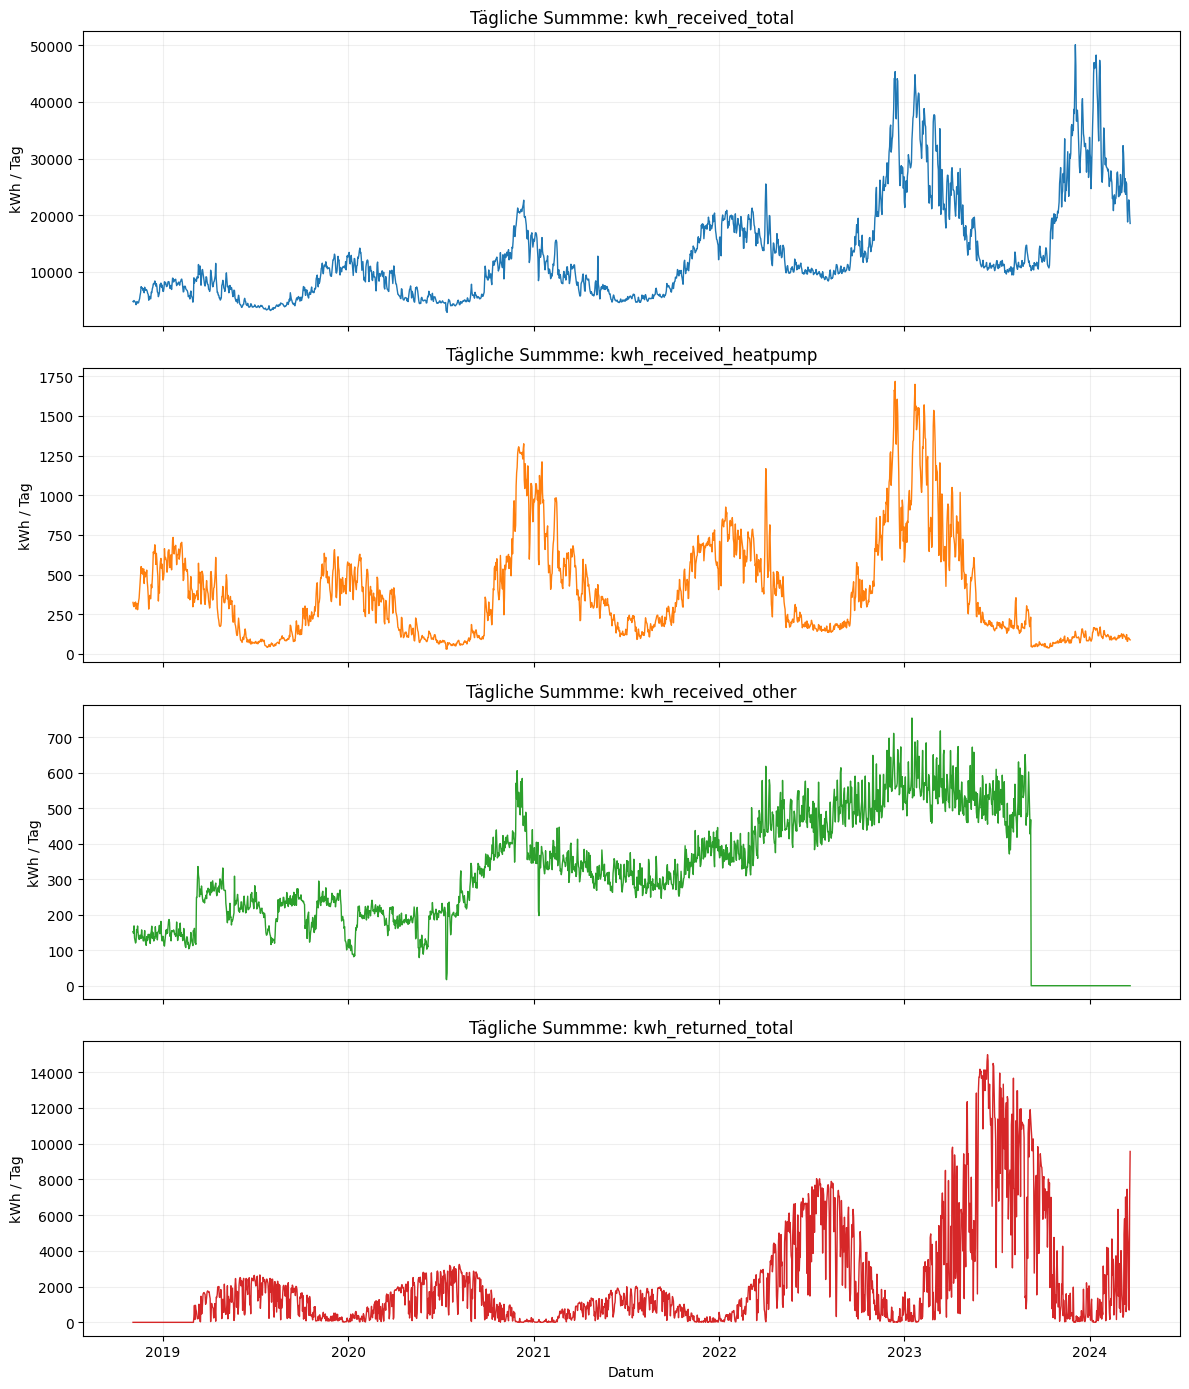

In [10]:

smart_meter = smart_meter.with_columns(
    pl.col("timestamp_local").dt.date().alias("date")
)

smart_meter_sum = (smart_meter.group_by('date').agg([
                                                        pl.col("kwh_received_total").sum(),
                                                        pl.col("kwh_received_heatpump").sum(),
                                                        pl.col("kwh_received_other").sum(),
                                                        pl.col("kwh_returned_total").sum()
                                                        ]).sort("date"))

import matplotlib.pyplot as plt

metrics = ["kwh_received_total", "kwh_received_heatpump", "kwh_received_other", "kwh_returned_total"]
fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 14), sharex=True)

for i, col in enumerate(metrics):
    # Polars Series direkt plotten
    axes[i].plot(
        smart_meter_sum["date"], 
        smart_meter_sum[col], 
        label=f"Daily Avg {col}", 
        color=f"C{i}",
        linewidth=1
    )
    axes[i].set_title(f"Tägliche Summme: {col}", fontsize=12)
    axes[i].set_ylabel("kWh / Tag")
    axes[i].grid(True, alpha=0.2)

plt.xlabel("Datum")
plt.tight_layout()
plt.show()

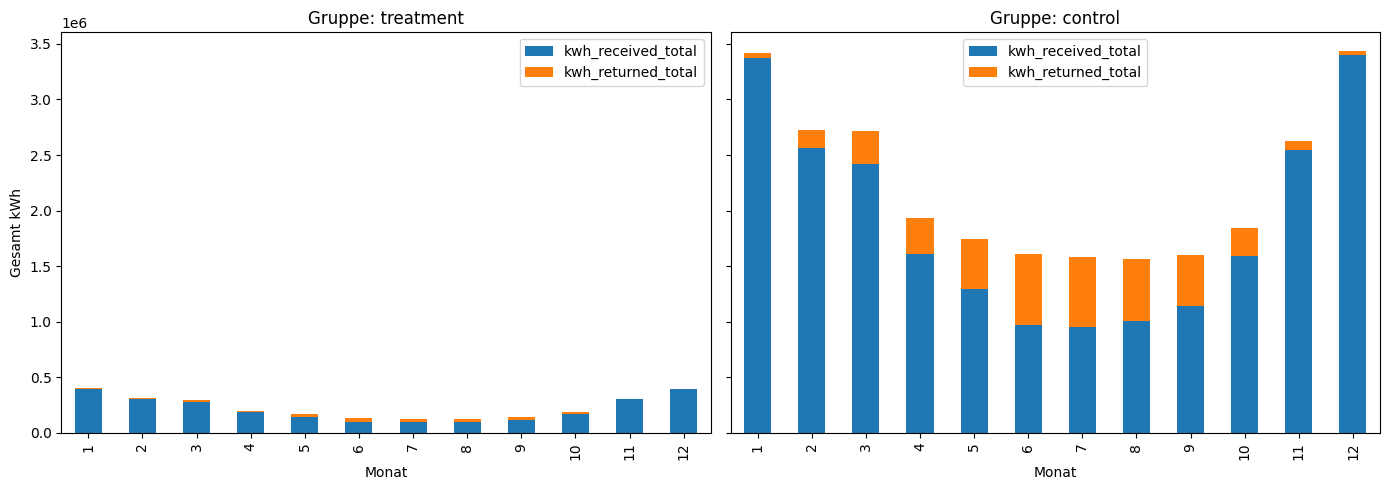

In [15]:
import matplotlib.pyplot as plt

# Wir berechnen die Summen pro Gruppe und Monat für einen besseren Überblick
# Falls du 'date' noch nicht hast, vorher: .with_columns(pl.col("timestamp").dt.date().alias("date"))
plot_df = (
    smart_meter
    .with_columns(pl.col("date").dt.month().alias("month"))
    .group_by(["group_assignment", "month"])
    .agg([
        pl.col("kwh_received_total").sum(),
        pl.col("kwh_returned_total").sum()
    ])
    .sort("month")
)

# Plotten
groups = plot_df["group_assignment"].unique().to_list()
fig, axes = plt.subplots(1, len(groups), figsize=(14, 5), sharey=True)

for i, group in enumerate(groups):
    # Filter für die aktuelle Gruppe und Umwandlung zu Pandas nur für den Plot
    group_data = plot_df.filter(pl.col("group_assignment") == group).to_pandas()
    
    # Bar-Plot: Received vs Returned
    group_data.set_index("month")[["kwh_received_total", "kwh_returned_total"]].plot(
        kind="bar", 
        stacked=True, 
        ax=axes[i],
        color=["#1f77b4", "#ff7f0e"] # Blau für Bezug, Orange für Rückspeisung
    )
    
    axes[i].set_title(f"Gruppe: {group}")
    axes[i].set_xlabel("Monat")
    axes[i].set_ylabel("Gesamt kWh")

plt.tight_layout()
plt.show()